**Proyek Akhir Bab: Analisis Lanjutan Data Penjualan**

***Skenario: Anda telah berhasil membuat kolom "Total Pendapatan". Sekarang, manajer penjualan ingin Anda melakukan analisis lebih dalam untuk menemukan produk mana yang menjadi "pahlawan tanpa tanda jasa" dan mana yang merupakan "produk mewah". Selain itu, ia ingin melihat ringkasan performa penjualan.***

----

**Tantangan**

**1. Temukan "Pahlawan Tanpa Tanda Jasa"**
- Pelanggan sering membeli barang ini dalam jumlah banyak meskipun harganya murah. Manajer mendefinisikannya sebagai produk dengan Jumlah Terjual di atas 9 unit DAN Harga Satuan di bawah Rp 1.000.000.
- Lakukan subsetting (pemilihan data) untuk menemukan produk yang memenuhi kriteria ini.

**2. Identifikasi "Produk Mewah"**

- Ini adalah produk mahal yang tidak perlu terjual banyak untuk memberikan pendapatan besar. Definisinya adalah produk dengan Total Pendapatan lebih dari Rp 40.000.000.
- Lakukan subsetting untuk menemukan produk yang memenuhi kriteria ini.

**3. Buat Kolom Status Performa**

- Manajer ingin label yang jelas. Buat kolom baru bernama 'Status Performa'.

- Gunakan perulangan (for loop dengan .iterrows()) dan logika kondisional (if/elif/else) untuk mengisi kolom ini:

    - Jika 'Total Pendapatan' > 25.000.000, isi dengan "Bintang 5".

    - Jika tidak, periksa apakah 'Jumlah Terjual' > 10. Jika ya, isi dengan "Volume Tinggi".

    - Jika tidak keduanya, isi dengan "Standar".

**4. (Tantangan Ekstra) Urutkan & Tampilkan Hasil Akhir**

- Urutkan keseluruhan DataFrame berdasarkan 'Total Pendapatan' dari yang terbesar ke terkecil.
- Tampilkan hanya kolom 'Produk', 'Total Pendapatan', dan 'Status Performa' dari DataFrame yang sudah diurutkan.
[Gambar dari DataFrame Pandas yang telah difilter dan diurutkan]

______

In [61]:
import pandas as pd
import numpy as np

data_penjualan = {
    'Tanggal' : ['2024-07-01', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-03', '2024-07-04'],
    'Produk' : ['Laptop', 'Mouse', 'Laptop', 'Monitor', 'Keyboard', 'Mouse'],
    'Kategori': ['Elektronik', 'Aksesoris', 'Elektronik', 'Elektronik', 'Aksesoris', 'Aksesoris'],
    'Harga Satuan': [15000000, 150000, 15500000, 3500000, 750000, 160000],
    'Jumlah Terjual': [5, 10, 3, 7, 8, 12]
}
df_penjualan = pd.DataFrame(data_penjualan)
df_penjualan['Total Pendapatan'] = np.array(df_penjualan['Harga Satuan']) * np.array(df_penjualan['Jumlah Terjual'])
df_penjualan 

,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan
0,2024-07-01,Laptop,Elektronik,15000000,5,75000000
1,2024-07-01,Mouse,Aksesoris,150000,10,1500000
2,2024-07-02,Laptop,Elektronik,15500000,3,46500000
3,2024-07-03,Monitor,Elektronik,3500000,7,24500000
4,2024-07-03,Keyboard,Aksesoris,750000,8,6000000
5,2024-07-04,Mouse,Aksesoris,160000,12,1920000


-----

**1. Temukan "Pahlawan Tanpa Tanda Jasa"**

In [62]:

                                  # berdasarkan soal ini yang di minta--------------------------------------stop
pahlawan_penjualan = df_penjualan[(df_penjualan['Jumlah Terjual'] > 9) & (df_penjualan['Harga Satuan'] < 1000000).sum()]['Produk']
print("pahlawannya adalah:", pahlawan_penjualan.values[0])

# ada dua penjualan dari produk yang sama jadi di  ambil dari penjualan tertinggi sama saja


pahlawannya adalah: Mouse


---

**2. Identifikasi "Produk Mewah"**

In [63]:
                            # ini yang diminta soal---------------------------stop
produk_mewah = df_penjualan[df_penjualan['Total Pendapatan'] > 40000000]['Produk']
print("Produk mewahnya adalah:", produk_mewah.values[0])


Produk mewahnya adalah: Laptop


---

**3. Buat Kolom Status Performa**


In [64]:
Status_Performa = []

for index, baris in df_penjualan.iterrows():
    if baris['Total Pendapatan'] > 25000000:
        Status_Performa.append('Bintang 5')
    elif baris['Jumlah Terjual'] > 10:
        Status_Performa.append('Volume Tinggi')
    else:
        Status_Performa.append('Standar')

df_penjualan['Status Performa'] = Status_Performa
# df_penjualan.sort_values(ascending=False)
df_penjualan







,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan,Status Performa
0,2024-07-01,Laptop,Elektronik,15000000,5,75000000,Bintang 5
1,2024-07-01,Mouse,Aksesoris,150000,10,1500000,Standar
2,2024-07-02,Laptop,Elektronik,15500000,3,46500000,Bintang 5
3,2024-07-03,Monitor,Elektronik,3500000,7,24500000,Standar
4,2024-07-03,Keyboard,Aksesoris,750000,8,6000000,Standar
5,2024-07-04,Mouse,Aksesoris,160000,12,1920000,Volume Tinggi


----

**4. (Tantangan Ekstra) Urutkan & Tampilkan Hasil Akhir**

In [65]:
hasil_akhir = df_penjualan.sort_values('Total Pendapatan', ascending=False).reset_index(drop=True)
hasil_akhir[['Produk', 'Total Pendapatan', 'Status Performa']]


,Produk,Total Pendapatan,Status Performa
0,Laptop,75000000,Bintang 5
1,Laptop,46500000,Bintang 5
2,Monitor,24500000,Standar
3,Keyboard,6000000,Standar
4,Mouse,1920000,Volume Tinggi
5,Mouse,1500000,Standar


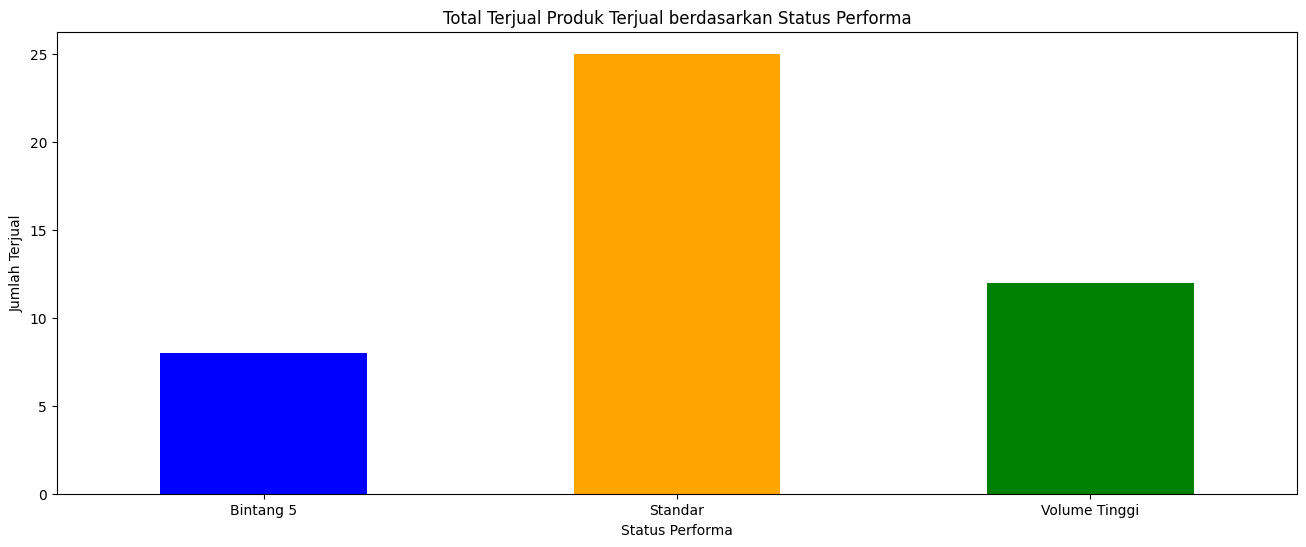

In [66]:
#additional context

import matplotlib.pyplot as plt

perbandinga_status_Performa = hasil_akhir.groupby('Status Performa')['Jumlah Terjual'].sum()

plt.figure(figsize=(16,6))
perbandinga_status_Performa.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Total Terjual Produk Terjual berdasarkan Status Performa')
plt.xticks(rotation=0)
plt.xlabel('Status Performa')
plt.ylabel('Jumlah Terjual')

plt.show()
